## I. Non-class object xor-NN

A first iteration of our neural-nerwork will be a simple XOR predictor. Based on the binary input, it should show us the probability that the output is either true or false.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf # Deep learning library, will be used to test if our network is working correctly against a predifined library

In [2]:
import matplotlib.pyplot as plt # Used for plotting the inputs and errors

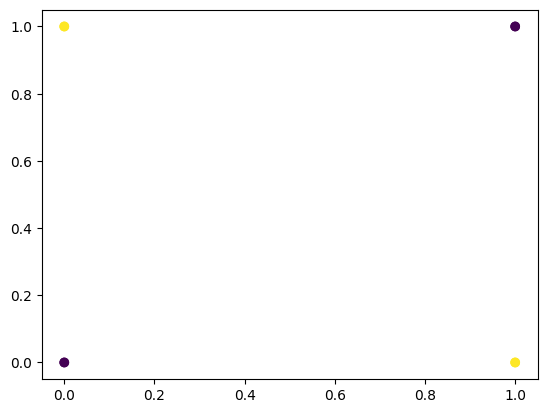

In [ ]:
# Generating a simple dataset for XOR binary values. This will be a classification model
# The XOR function is a binary operation that returns true if the two inputs are different, and false if they are the same.

# Input datasets
inputs = np.array([[0,0], [0,1], [1,0], [1,1], [0,0], [1,0], [0,1], [1,1]])

# Output datasets
outputs = np.array([[0], [1], [1], [0], [0], [1], [1], [0]])


# Plotting the input datasets, to see if the data is separable
plt.scatter(inputs[:,0], inputs[:,1], c=outputs)
plt.show()

In [36]:
# Setting up the layers and number of neurons. So we have 2 inputs, 2 hidden layers with 2 neurons each, and 1 output
# The activation function is sigmoid, which is a non-linear function that maps any real number to a value between 0 and 1

# Epochs: number of times the model will see the data
epochs = 1000

# Learning rate: how much the model will adjust its weights during training
learning_rate = 3

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2, 2, 1
# Definign the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def derivative_sigmoid(x):
    return x * (1 - x) # Esential in the backpropagation process

# Random weights and biases
hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
hidden_biases = np.random.uniform(size=(1, hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
output_biases = np.random.uniform(size=(1, outputLayerNeurons))

print("Initial hidden weights: ", hidden_weights)
print("Initial hidden biases: ", hidden_biases)
print("Initial output weights: ", output_weights)
print("Initial output biases: ", output_biases)

# Biases are used to shift the activation function, and weights are used to scale the input. 
# These are random values to start with and are only applied to hidden layer and out 

loss = [] # Used to store the loss values

# Training algorithm 

for i in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(inputs, hidden_weights) + hidden_biases
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_biases
    predicted_outputs = sigmoid(output_layer_activation)

    # Backpropagation
    error = outputs - predicted_outputs
    loss.append(np.sqrt(np.square(error).mean())) #RMSE
    # print("Error: ", loss[i])

    # Derivative of the sigmoid function
    d_predicted_outputs = error * derivative_sigmoid(predicted_outputs)
    error_hidden_layer = d_predicted_outputs.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * derivative_sigmoid(hidden_layer_output)

    # Updating the weights and biases using gradient descent
    output_weights += hidden_layer_output.T.dot(d_predicted_outputs) * learning_rate
    output_biases += np.sum(d_predicted_outputs, axis=0, keepdims=True) * learning_rate
    hidden_weights += inputs.T.dot(d_hidden_layer) * learning_rate
    hidden_biases += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

print("Final hidden weights: ", hidden_weights)
print("Final hidden biases: ", hidden_biases)
print("Final output weights: ", output_weights)
print("Final output biases: ", output_biases)



print("\nOutput from nn after 1000 epochs: ", end="")
print(*predicted_outputs)

Initial hidden weights:  [[0.50231238 0.14588868]
 [0.16213426 0.26363002]]
Initial hidden biases:  [[0.76095739 0.09095267]]
Initial output weights:  [[0.20040681]
 [0.34718712]]
Initial output biases:  [[0.61669464]]
Final hidden weights:  [[-4.79942522 -6.36351527]
 [-4.80243985 -6.37836128]]
Final hidden biases:  [[7.14791889 2.59915483]]
Final output weights:  [[ 9.79683863]
 [-9.97529794]]
Final output biases:  [[-4.63828048]]

Output from nn after 1000 epochs: [0.01577369] [0.98335033] [0.98333554] [0.02058278] [0.01577369] [0.98333554] [0.98335033] [0.02058278]


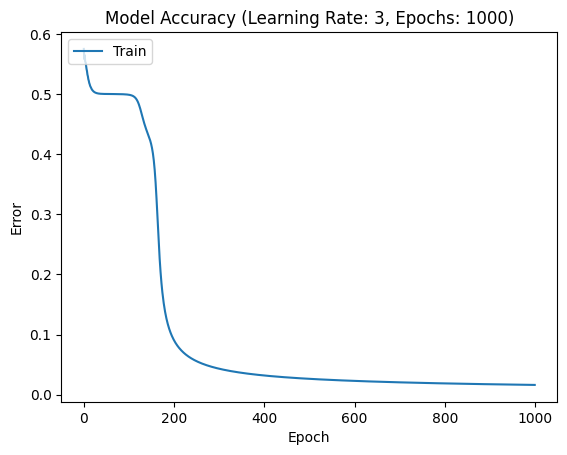

In [34]:
# Plot training & validation accuracy values
plt.plot(loss)
plt.title(f'Model Accuracy (Learning Rate: {learning_rate}, Epochs: {epochs})')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


## II. Class Object xor-NN

In [37]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        """
        Initialize the neural network with one hidden layer
        
        Parameters:
        - input_size: Number of input neurons
        - hidden_size: Number of hidden neurons
        - output_size: Number of output neurons
        - learning_rate: Learning rate for weight updates
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases with random values
        self.hidden_weights = np.random.uniform(size=(input_size, hidden_size))
        self.hidden_biases = np.random.uniform(size=(1, hidden_size))
        self.output_weights = np.random.uniform(size=(hidden_size, output_size))
        self.output_biases = np.random.uniform(size=(1, output_size))
        
        # For storing the loss history
        self.loss_history = []
    
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))
    
    def derivative_sigmoid(self, x):
        """Derivative of sigmoid function for backpropagation"""
        return x * (1 - x)
    
    def forward(self, X):
        """
        Forward pass through the network
        
        Parameters:
        - X: Input data
        
        Returns:
        - predicted_output: Output after forward pass
        """
        # Hidden layer
        self.hidden_layer_activation = np.dot(X, self.hidden_weights) + self.hidden_biases
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_activation)
        
        # Output layer
        self.output_layer_activation = np.dot(self.hidden_layer_output, self.output_weights) + self.output_biases
        predicted_output = self.sigmoid(self.output_layer_activation)
        
        return predicted_output
    
    def backward(self, X, y, predicted_output):
        """
        Backward pass to update weights and biases
        
        Parameters:
        - X: Input data
        - y: True labels
        - predicted_output: Output from forward pass
        
        Returns:
        - loss: RMSE loss for this step
        """
        # Calculate error
        error = y - predicted_output
        
        # Output layer gradient
        d_predicted_outputs = error * self.derivative_sigmoid(predicted_output)
        
        # Hidden layer gradient
        error_hidden_layer = d_predicted_outputs.dot(self.output_weights.T)
        d_hidden_layer = error_hidden_layer * self.derivative_sigmoid(self.hidden_layer_output)
        
        # Update weights and biases
        self.output_weights += self.hidden_layer_output.T.dot(d_predicted_outputs) * self.learning_rate
        self.output_biases += np.sum(d_predicted_outputs, axis=0, keepdims=True) * self.learning_rate
        self.hidden_weights += X.T.dot(d_hidden_layer) * self.learning_rate
        self.hidden_biases += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate
        
        # Calculate RMSE loss
        loss = np.sqrt(np.square(error).mean())
        return loss
    
    def train(self, X, y, epochs=1000):
        """
        Train the neural network
        
        Parameters:
        - X: Training inputs
        - y: Training targets 
        - epochs: Number of training iterations
        """
        self.loss_history = []
        
        for i in range(epochs):
            # Forward pass
            predicted_output = self.forward(X)
            
            # Backward pass and get loss
            loss = self.backward(X, y, predicted_output)
            self.loss_history.append(loss)
        
        return self.loss_history
    
    def predict(self, X):
        """
        Make predictions with the trained network
        
        Parameters:
        - X: Input data
        
        Returns:
        - predictions: Model predictions
        """
        return self.forward(X)
    
    def summary(self):
        """Print a summary of the network architecture"""
        print(f"Neural Network Architecture:")
        print(f"Input layer: {self.input_size} neurons")
        print(f"Hidden layer: {self.hidden_size} neurons")
        print(f"Output layer: {self.output_size} neurons")
        print(f"Learning rate: {self.learning_rate}")

Let's test this custom class on the same dataset as before to see how it differs in implementation

Neural Network Architecture:
Input layer: 2 neurons
Hidden layer: 2 neurons
Output layer: 1 neurons
Learning rate: 3

Predictions:
Input: [0 0] -> Predicted: 0.0162, Actual: 0
Input: [0 1] -> Predicted: 0.9814, Actual: 1
Input: [1 0] -> Predicted: 0.9849, Actual: 1
Input: [1 1] -> Predicted: 0.0145, Actual: 0
Input: [0 0] -> Predicted: 0.0162, Actual: 0
Input: [1 0] -> Predicted: 0.9849, Actual: 1
Input: [0 1] -> Predicted: 0.9814, Actual: 1
Input: [1 1] -> Predicted: 0.0145, Actual: 0


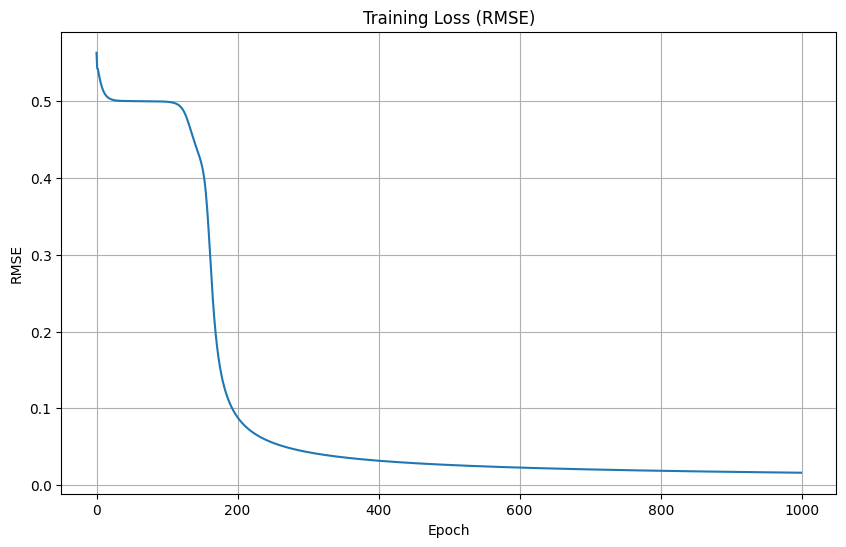

In [41]:
# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1], [0,0], [1,0], [0,1], [1,1]])
y = np.array([[0], [1], [1], [0], [0], [1], [1], [0]])

# Create and train the network
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=3)
nn.summary()

# Train the network
loss_history = nn.train(X, y, epochs=1000)

# Make predictions
predictions = nn.predict(X)

print("\nPredictions:")
for i, pred in enumerate(predictions):
    print(f"Input: {X[i]} -> Predicted: {pred[0]:.4f}, Actual: {y[i][0]}")

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Training Loss (RMSE)')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

## III. TensorFlow object